In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn import model_selection, preprocessing, metrics
import warnings

warnings.filterwarnings('ignore')
import os

In [4]:
df = pd.read_csv('../data/energydata_complete.csv')
df.head()

date  Appliances  lights     T1       RH_1    T2       RH_2  \
0  2016-01-11 17:00:00          60      30  19.89  47.596667  19.2  44.790000   
1  2016-01-11 17:10:00          60      30  19.89  46.693333  19.2  44.722500   
2  2016-01-11 17:20:00          50      30  19.89  46.300000  19.2  44.626667   
3  2016-01-11 17:30:00          50      40  19.89  46.066667  19.2  44.590000   
4  2016-01-11 17:40:00          60      40  19.89  46.333333  19.2  44.530000   

      T3       RH_3         T4  ...         T9   RH_9     T_out  Press_mm_hg  \
0  19.79  44.730000  19.000000  ...  17.033333  45.53  6.600000        733.5   
1  19.79  44.790000  19.000000  ...  17.066667  45.56  6.483333        733.6   
2  19.79  44.933333  18.926667  ...  17.000000  45.50  6.366667        733.7   
3  19.79  45.000000  18.890000  ...  17.000000  45.40  6.250000        733.8   
4  19.79  45.000000  18.890000  ...  17.000000  45.40  6.133333        733.9   

   RH_out  Windspeed  Visibility  Tdewpoint        rv1        rv2  
0    92.0   7.000000   63.000000        5.3  13.275433  13.275433  
1    92.0   6.666667   59.166667        5.2  18.606195  18.606195  
2    92.0   6.333333   55.333333        5.1  28.642668  28.642668  
3    92.0   6.000000   51.500000        5.0  45.410389  45.410389  
4    92.0   5.666667   47.666667        4.9  10.084097  10.084097  

[5 rows x 29 columns]

In [3]:
df.drop(['lights'], axis =1, inplace=True)
df.head()

NameError: name 'df' is not defined

In [5]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.30, random_state=42)

In [6]:
train.describe()

Appliances        lights            T1          RH_1            T2  \
count  13814.000000  13814.000000  13814.000000  13814.000000  13814.000000   
mean      97.727668      3.806283     21.686763     40.266932     20.340520   
std      102.960299      7.976589      1.609259      3.967834      2.194564   
min       10.000000      0.000000     16.790000     27.023333     16.100000   
25%       50.000000      0.000000     20.760000     37.363333     18.790000   
50%       60.000000      0.000000     21.600000     39.663333     20.000000   
75%      100.000000      0.000000     22.600000     43.085000     21.500000   
max     1080.000000     70.000000     26.260000     57.423333     29.856667   

               RH_2            T3          RH_3            T4          RH_4  \
count  13814.000000  13814.000000  13814.000000  13814.000000  13814.000000   
mean      40.434603     22.266034     39.248732     20.848127     39.046753   
std        4.072087      2.004065      3.251320      2.045198      4.331206   
min       20.596667     17.200000     28.766667     15.100000     28.424286   
25%       37.900000     20.790000     36.900000     19.533333     35.575250   
50%       40.500000     22.100000     38.560000     20.600000     38.463333   
75%       43.290000     23.290000     41.766667     22.100000     42.163333   
max       54.766667     29.236000     50.163333     26.200000     51.090000   

       ...            T9          RH_9         T_out   Press_mm_hg  \
count  ...  13814.000000  13814.000000  13814.000000  13814.000000   
mean   ...     19.487097     41.572240      7.407235    755.540437   
std    ...      2.019205      4.154877      5.323896      7.366515   
min    ...     14.890000     29.166667     -5.000000    729.300000   
25%    ...     18.000000     38.530000      3.633333    750.916667   
50%    ...     19.390000     40.930000      6.900000    756.100000   
75%    ...     20.600000     44.363333     10.400000    760.950000   
max    ...     24.500000     53.326667     26.100000    772.283333   

             RH_out     Windspeed   Visibility     Tdewpoint           rv1  \
count  13814.000000  13814.000000  13814.00000  13814.000000  13814.000000   
mean      79.822901      4.033814     38.32902      3.770230     25.042683   
std       14.905399      2.441628     11.84537      4.201109     14.511587   
min       24.000000      0.000000      1.00000     -6.600000      0.013539   
25%       70.333333      2.000000     29.00000      0.900000     12.471474   
50%       84.000000      3.666667     40.00000      3.450000     24.970778   
75%       91.666667      5.500000     40.00000      6.600000     37.663967   
max      100.000000     14.000000     66.00000     15.400000     49.996530   

                rv2  
count  13814.000000  
mean      25.042683  
std       14.511587  
min        0.013539  
25%       12.471474  
50%       24.970778  
75%       37.663967  
max       49.996530  

[8 rows x 28 columns]

In [7]:
# Divide the columns based on type for clear column management 

int_temp = ["T1","T2","T3","T4","T5","T6","T7","T8","T9"]

int_hum = ["RH_1","RH_2","RH_3","RH_4","RH_5","RH_6","RH_7","RH_8","RH_9"]

ext_weather = ["T_out", "Tdewpoint","RH_out","Press_mm_hg",
                "Windspeed","Visibility"] 

rand_var = ["rv1", "rv2"]

target_var = ["Appliances"]

In [8]:
# Separate dependent and independent variables
feature_vars = train[int_temp + int_hum + ext_weather + rand_var ]
target_vars = train[target_var]

In [9]:
feature_vars.describe()

T1            T2            T3            T4            T5  \
count  13814.000000  13814.000000  13814.000000  13814.000000  13814.000000   
mean      21.686763     20.340520     22.266034     20.848127     19.594472   
std        1.609259      2.194564      2.004065      2.045198      1.847289   
min       16.790000     16.100000     17.200000     15.100000     15.330000   
25%       20.760000     18.790000     20.790000     19.533333     18.290000   
50%       21.600000     20.000000     22.100000     20.600000     19.390000   
75%       22.600000     21.500000     23.290000     22.100000     20.600000   
max       26.260000     29.856667     29.236000     26.200000     25.795000   

                 T6            T7            T8            T9          RH_1  \
count  13814.000000  13814.000000  13814.000000  13814.000000  13814.000000   
mean       7.898266     20.267629     22.029959     19.487097     40.266932   
std        6.097290      2.113199      1.957590      2.019205      3.967834   
min       -6.030000     15.390000     16.306667     14.890000     27.023333   
25%        3.590000     18.700000     20.790000     18.000000     37.363333   
50%        7.300000     20.033333     22.120000     19.390000     39.663333   
75%       11.245000     21.600000     23.390000     20.600000     43.085000   
max       28.290000     25.963333     27.230000     24.500000     57.423333   

       ...          RH_8          RH_9         T_out     Tdewpoint  \
count  ...  13814.000000  13814.000000  13814.000000  13814.000000   
mean   ...     42.961811     41.572240      7.407235      3.770230   
std    ...      5.226095      4.154877      5.323896      4.201109   
min    ...     29.600000     29.166667     -5.000000     -6.600000   
25%    ...     39.120833     38.530000      3.633333      0.900000   
50%    ...     42.400000     40.930000      6.900000      3.450000   
75%    ...     46.560000     44.363333     10.400000      6.600000   
max    ...     58.780000     53.326667     26.100000     15.400000   

             RH_out   Press_mm_hg     Windspeed   Visibility           rv1  \
count  13814.000000  13814.000000  13814.000000  13814.00000  13814.000000   
mean      79.822901    755.540437      4.033814     38.32902     25.042683   
std       14.905399      7.366515      2.441628     11.84537     14.511587   
min       24.000000    729.300000      0.000000      1.00000      0.013539   
25%       70.333333    750.916667      2.000000     29.00000     12.471474   
50%       84.000000    756.100000      3.666667     40.00000     24.970778   
75%       91.666667    760.950000      5.500000     40.00000     37.663967   
max      100.000000    772.283333     14.000000     66.00000     49.996530   

                rv2  
count  13814.000000  
mean      25.042683  
std       14.511587  
min        0.013539  
25%       12.471474  
50%       24.970778  
75%       37.663967  
max       49.996530  

[8 rows x 26 columns]

In [10]:
target_vars.describe()

Appliances
count  13814.000000
mean      97.727668
std      102.960299
min       10.000000
25%       50.000000
50%       60.000000
75%      100.000000
max     1080.000000

**Observations**

1. **Temperature columns:** Temperature inside the house varies between 14.89 Deg & 29.85 Deg , temperatire outside (T6) varies between -6.06 Deg to 28.29 Deg . The reason for this variation is sensors are kept outside the house

2. **Humidity columns:** Humidity inside house varies is between 20.60% to 63.36% with exception of RH_5 (Bathroom) and RH_6 (Outside house) which varies between 29.82% to 96.32% and 1% to 99.9% respectively.

3. **Appliances:** 75% of Appliance consumption is less than 100 Wh . With the maximum consumption of 1080 Wh , there will be outliers in this column and there are small number of cases where consumption is very high

In [11]:
# plotly
import plotly.graph_objects as go

# To understand the time series variation of the appliance energy consumption
visData = go.Scatter( x= df.date  ,  mode = "lines", y = df.Appliances )
layout = go.Layout(title = 'Appliance energy consumption measurement' , xaxis=dict(title='Date'), yaxis=dict(title='(Wh)'))
fig = go.Figure(data=[visData],layout=layout)

fig.show()

In [12]:
# Adding column to mark weekdays (0) and weekends(1) for time series evaluation , 
# decided not to use it for model evaluation as it has least impact

df['WEEKDAY'] = ((pd.to_datetime(df['date']).dt.dayofweek)// 5 == 1).astype(float)
# There are 5472 weekend recordings 
df['WEEKDAY'].value_counts()

0.0    14263
1.0     5472
Name: WEEKDAY, dtype: int64

In [13]:
# Find rows with weekday 
temp_weekday =  df[df['WEEKDAY'] == 0]
# To understand the time series variation of the appliance energy consumption
visData = go.Scatter( x= temp_weekday.date  ,  mode = "lines", y = temp_weekday.Appliances )
layout = go.Layout(title = 'Appliance energy consumption measurement on weekdays' , xaxis=dict(title='Date'), yaxis=dict(title='(Wh)'))
fig = go.Figure(data=[visData],layout=layout)

fig.show()

In [14]:
# Find rows with weekday 

temp_weekend =  df[df['WEEKDAY'] == 1]

# To understand the time series variation of the appliance energy consumption
visData = go.Scatter( x= temp_weekend.date  ,  mode = "lines", y = temp_weekend.Appliances )
layout = go.Layout(title = 'Appliance energy consumption measurement on weekend' , xaxis=dict(title='Date'), yaxis=dict(title='(Wh)'))
fig = go.Figure(data=[visData],layout=layout)

fig.show()

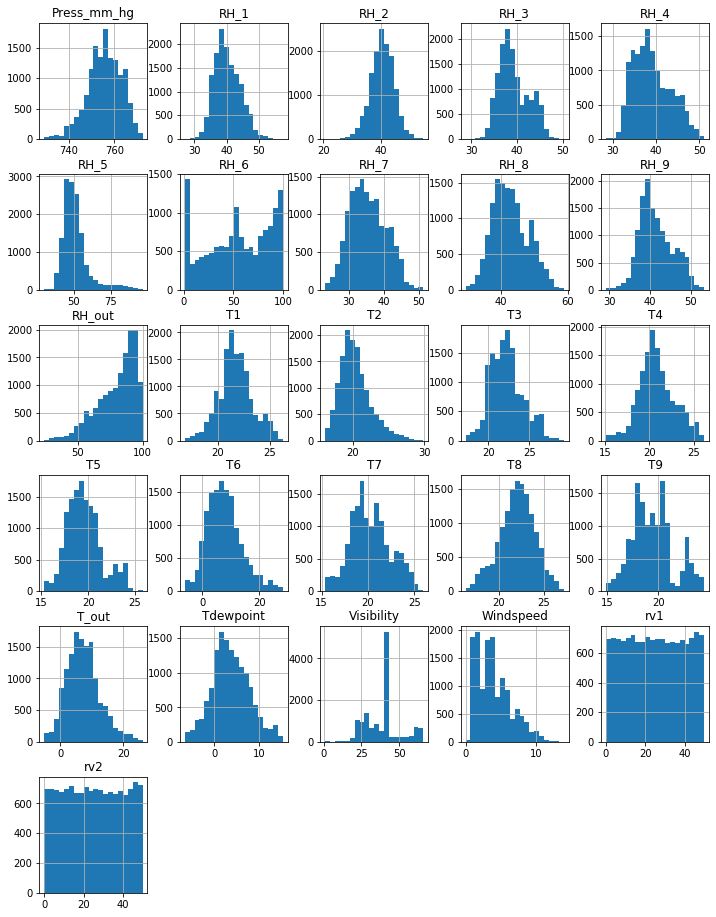

In [14]:
# Histogram of all the features to understand the distribution
feature_vars.hist(bins = 20 , figsize= (12,16)) ;

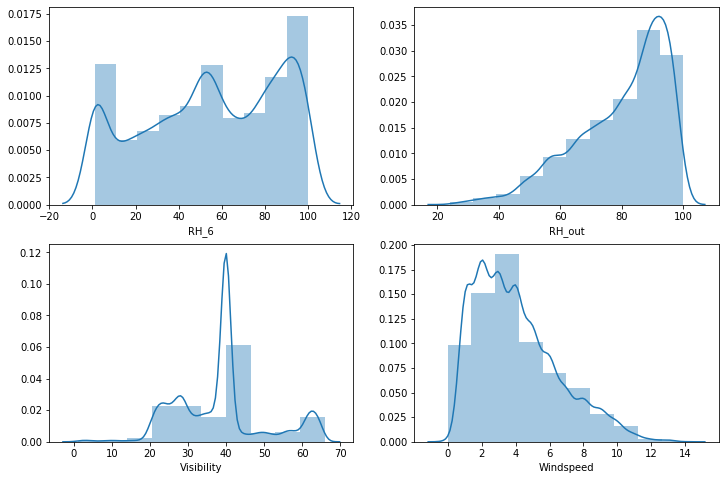

In [15]:
# focused displays for RH_6 , RH_out , Visibility , Windspeed due to irregular distribution
f, ax = plt.subplots(2,2,figsize=(12,8))
vis1 = sns.distplot(feature_vars["RH_6"],bins=10, ax= ax[0][0])
vis2 = sns.distplot(feature_vars["RH_out"],bins=10, ax=ax[0][1])
vis3 = sns.distplot(feature_vars["Visibility"],bins=10, ax=ax[1][0])
vis4 = sns.distplot(feature_vars["Windspeed"],bins=10, ax=ax[1][1])

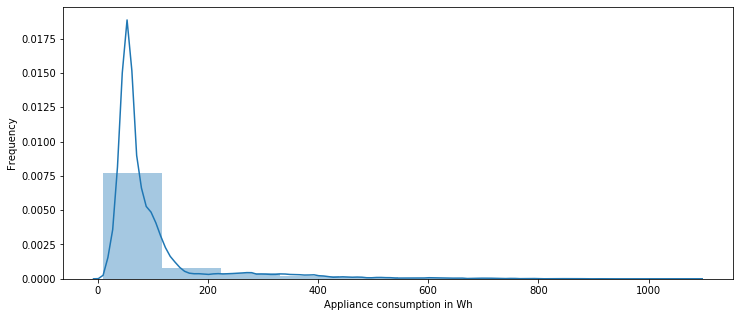

In [16]:
# Distribution of values in Appliances column
f = plt.figure(figsize=(12,5))
plt.xlabel('Appliance consumption in Wh')
plt.ylabel('Frequency')
sns.distplot(target_vars , bins=10 ) ;

**Observations** 

1. **Temperature:** All the columns follow normal distribution except T9
2. **Humidity:** All columns follow normal distribution except RH_6 and RH_out , primarly because these sensors are outside the house 
3. **Appliance:** This column is postively skewed , most the values are around mean 100 Wh . There are outliers in this column 
4. **Visibilty:** This column is negatively skewed
5. **Windspeed:** This column is postively skewed


In [17]:
#Appliance column range with consumption less than 200 Wh
print('Percentage of the appliance consumption is less than 200 Wh')
print(((target_vars[target_vars <= 200].count()) / (len(target_vars)))*100 )

Percentage of the appliance consumption is less than 200 Wh
Appliances    90.364847
dtype: float64


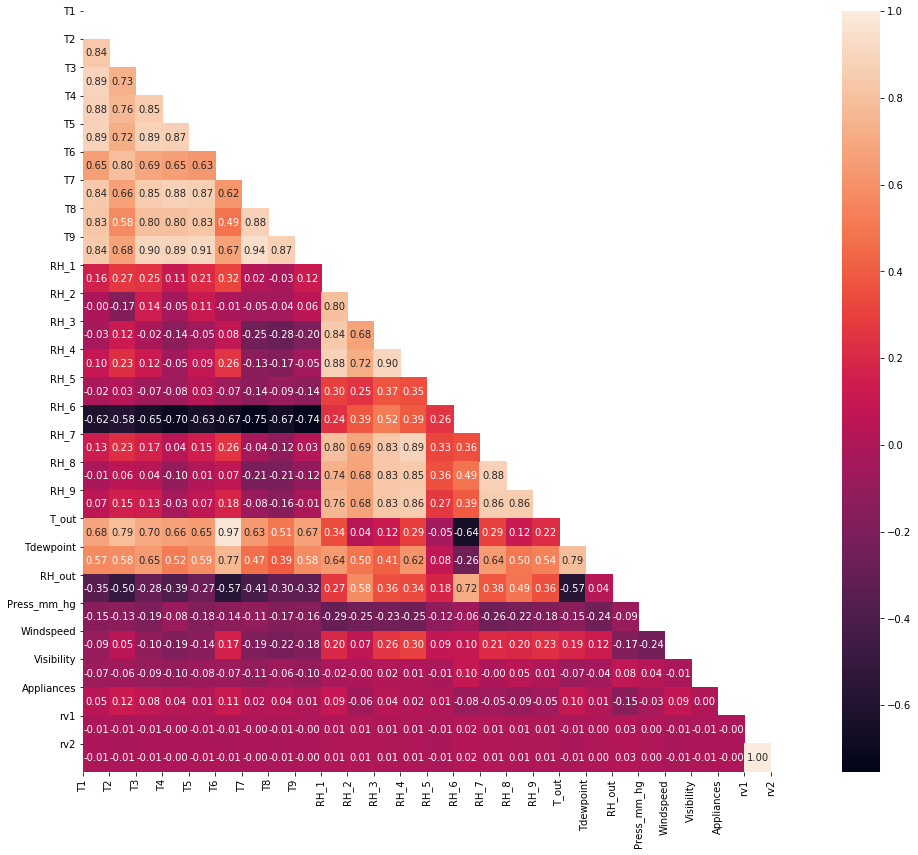

In [17]:
# Use the weather , temperature , appliances and random column to see the correlation
train_corr = train[int_temp + int_hum + ext_weather + target_var + rand_var]
corr = train_corr.corr()
# Mask the repeated values
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
  
f, ax = plt.subplots(figsize=(16, 14))
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, annot=True, fmt=".2f" , mask=mask,)
    #Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
    #Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
    #show plot
plt.show()

In [18]:
def get_redundant_pairs(df):
    """Get diagonal and lower triangular pairs of correlation matrix"""
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

# Function to get top correlations 

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(train_corr, 40))

Top Absolute Correlations
rv1    rv2          1.000000
T6     T_out        0.974943
T7     T9           0.944628
T5     T9           0.909808
T3     T9           0.902979
RH_3   RH_4         0.898992
RH_4   RH_7         0.894387
T1     T3           0.892725
T4     T9           0.890205
T3     T5           0.888264
T1     T5           0.885784
RH_7   RH_8         0.883225
T7     T8           0.882707
RH_1   RH_4         0.879513
T4     T7           0.878379
T1     T4           0.877687
T4     T5           0.872222
T8     T9           0.870056
T5     T7           0.869539
RH_7   RH_9         0.857925
RH_4   RH_9         0.855694
RH_8   RH_9         0.855694
T3     T4           0.853996
       T7           0.849470
RH_4   RH_8         0.847380
T1     T9           0.844488
RH_1   RH_3         0.844073
T1     T7           0.838649
       T2           0.836241
RH_3   RH_9         0.834217
       RH_7         0.833430
       RH_8         0.830490
T1     T8           0.827966
T5     T8        

### Observations based on correlation plot

1. **Temperature:** All the temperature variables from T1-T9 and T_out have positive correlation with the target Appliances . For the indoor temperatures, the correlations are high as expected, since the ventilation is driven by the HRV unit and minimizes air temperature differences between rooms. Four columns have a high degree of correlation with T9 - T3,T5,T7,T8 also T6 & T_Out has high correlation (both temperatures from outside) . Hence T6 & T9 can be removed from training set as information provided by them can be provided by other fields.

2. **Weather attributes:** Visibility, Tdewpoint, Press_mm_hg  have low correlation values

3. **Humidity:** There are no significantly high  correlation cases (> 0.9) for humidity sensors.

4. **Random variables:** these have no role to play


# **Data Pre-processing**

In [19]:
#Split training dataset into independent and dependent varibales
train_X = train[feature_vars.columns]
train_y = train[target_vars.columns]

In [20]:
#Split testing dataset into independent and dependent varibales
test_X = test[feature_vars.columns]
test_y = test[target_vars.columns]

In [21]:
# Due to the conclusion made above below columns are removed
train_X.drop(["rv1","rv2","Visibility","T6","T9"],axis=1 , inplace=True)

In [22]:
# Due to the conclusion made above below columns are removed
test_X.drop(["rv1","rv2","Visibility","T6","T9"], axis=1, inplace=True)

In [23]:
train_X.columns

Index(['T1', 'T2', 'T3', 'T4', 'T5', 'T7', 'T8', 'RH_1', 'RH_2', 'RH_3',
       'RH_4', 'RH_5', 'RH_6', 'RH_7', 'RH_8', 'RH_9', 'T_out', 'Tdewpoint',
       'RH_out', 'Press_mm_hg', 'Windspeed'],
      dtype='object')

In [24]:
test_X.columns

Index(['T1', 'T2', 'T3', 'T4', 'T5', 'T7', 'T8', 'RH_1', 'RH_2', 'RH_3',
       'RH_4', 'RH_5', 'RH_6', 'RH_7', 'RH_8', 'RH_9', 'T_out', 'Tdewpoint',
       'RH_out', 'Press_mm_hg', 'Windspeed'],
      dtype='object')

In [25]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

# Create test and training set by including Appliances column

train = train[list(train_X.columns.values) + target_var ]

test = test[list(test_X.columns.values) + target_var ]

# Create dummy test and training set to hold scaled values

sc_train = pd.DataFrame(columns=train.columns , index=train.index)

sc_train[sc_train.columns] = sc.fit_transform(train)

sc_test= pd.DataFrame(columns=test.columns , index=test.index)

sc_test[sc_test.columns] = sc.fit_transform(test)


In [26]:
sc_train.head()

T1        T2        T3        T4        T5        T7        T8  \
9129  -0.116059 -1.162241 -0.282453 -0.224009  0.002993  0.247203  0.035781   
2453  -1.358912 -0.747565 -1.218917 -1.343746 -1.296256 -0.651940 -1.655135   
9152  -0.557272 -1.572360 -0.282453 -0.561397 -0.164827  0.057910 -0.153234   
12694  0.256796 -0.171879  0.560863  0.123158  0.576827  0.502749  1.205629   
16952  1.872505  4.336393  1.948807  2.079029  1.933820  1.766282  1.228106   

           RH_1      RH_2      RH_3  ...      RH_6      RH_7      RH_8  \
9129  -1.169513  0.038163 -1.226848  ... -0.184521 -1.606474 -0.702617   
2453   1.082007  0.946821  1.615177  ...  1.027174  0.718310  0.428287   
9152  -1.226641  0.391803 -0.999240  ...  0.229722 -1.508630 -0.746629   
12694  0.754360  1.243977  0.166482  ... -0.901607 -0.351717 -0.789875   
16952  0.527528 -2.122969 -0.202612  ... -1.724100  1.104600  0.400732   

           RH_9     T_out  Tdewpoint    RH_out  Press_mm_hg  Windspeed  \
9129  -0.797222 -1.344409  -1.456866  0.213159     1.474233  -0.833005   
2453   1.105029 -0.796545  -0.667363  0.369707     1.320378  -0.833005   
9152  -0.602865 -1.685650  -1.635397  0.638076     1.419931  -1.106056   
12694 -1.004215  0.267877   0.467299  0.078974    -0.295099  -0.969530   
16952  0.696659  2.634651   1.673374 -1.933792    -0.467054  -0.833005   

       Appliances  
9129    -0.463571  
2453    -0.657828  
9152    -0.560699  
12694    0.216327  
16952   -0.463571  

[5 rows x 22 columns]

In [27]:
sc_test.head()

T1        T2        T3        T4        T5        T7        T8  \
8980  -0.498017 -1.179784 -0.985290 -0.545874 -0.536661  0.634538  0.533397   
2754   0.127535  0.432634 -0.317254 -0.166301 -1.038311 -1.605657 -0.722263   
9132  -0.185241 -1.237642 -0.300677 -0.285735  0.007296  0.249282  0.037321   
14359 -0.185241  1.620251 -0.118335  0.745002  0.025428 -0.102681 -0.423550   
8875  -1.077694 -1.772070 -1.129507 -0.791287 -0.922871  0.059032  0.037321   

           RH_1      RH_2      RH_3  ...      RH_6      RH_7      RH_8  \
8980  -1.208966 -0.301158 -0.713635  ...  0.302786 -0.327077 -0.599414   
2754   3.209552  1.223496  3.065099  ...  1.371000  0.781999  0.897923   
9132  -1.184003  0.035102 -1.234770  ... -0.110983 -1.571167 -0.622563   
14359  0.197304 -1.364889 -0.703417  ... -1.415530 -0.966039 -0.916953   
8875  -1.277199 -0.064135 -0.866910  ...  0.540756 -0.249646 -0.629587   

           RH_9     T_out  Tdewpoint    RH_out  Press_mm_hg  Windspeed  \
8980  -0.597629 -1.066595  -0.894492  0.587792     1.795059  -0.695509   
2754   0.650189 -0.890569  -0.607373  0.699727    -0.117850  -0.425975   
9132  -0.776233 -1.362068  -1.468730  0.229602     1.433881  -0.830277   
14359 -0.711066  0.269321  -0.005221 -0.587521     1.647912   0.450013   
8875  -0.194562 -1.487802  -1.241428  0.923596     1.895387  -0.021672   

       Appliances  
8980    -0.567661  
2754    -0.075059  
9132    -0.469141  
14359   -0.469141  
8875    -0.272100  

[5 rows x 22 columns]

In [28]:
# Remove Appliances column from training set

train_X =  sc_train.drop(['Appliances'] , axis=1)
train_y = sc_train['Appliances']

test_X =  sc_test.drop(['Appliances'] , axis=1)
test_y = sc_test['Appliances']

In [29]:
train_X.head()

T1        T2        T3        T4        T5        T7        T8  \
9129  -0.116059 -1.162241 -0.282453 -0.224009  0.002993  0.247203  0.035781   
2453  -1.358912 -0.747565 -1.218917 -1.343746 -1.296256 -0.651940 -1.655135   
9152  -0.557272 -1.572360 -0.282453 -0.561397 -0.164827  0.057910 -0.153234   
12694  0.256796 -0.171879  0.560863  0.123158  0.576827  0.502749  1.205629   
16952  1.872505  4.336393  1.948807  2.079029  1.933820  1.766282  1.228106   

           RH_1      RH_2      RH_3  ...      RH_5      RH_6      RH_7  \
9129  -1.169513  0.038163 -1.226848  ... -1.166053 -0.184521 -1.606474   
2453   1.082007  0.946821  1.615177  ...  0.116102  1.027174  0.718310   
9152  -1.226641  0.391803 -0.999240  ... -1.224207  0.229722 -1.508630   
12694  0.754360  1.243977  0.166482  ...  0.786699 -0.901607 -0.351717   
16952  0.527528 -2.122969 -0.202612  ...  1.016656 -1.724100  1.104600   

           RH_8      RH_9     T_out  Tdewpoint    RH_out  Press_mm_hg  \
9129  -0.702617 -0.797222 -1.344409  -1.456866  0.213159     1.474233   
2453   0.428287  1.105029 -0.796545  -0.667363  0.369707     1.320378   
9152  -0.746629 -0.602865 -1.685650  -1.635397  0.638076     1.419931   
12694 -0.789875 -1.004215  0.267877   0.467299  0.078974    -0.295099   
16952  0.400732  0.696659  2.634651   1.673374 -1.933792    -0.467054   

       Windspeed  
9129   -0.833005  
2453   -0.833005  
9152   -1.106056  
12694  -0.969530  
16952  -0.833005  

[5 rows x 21 columns]

In [30]:
train_y.head()

9129    -0.463571
2453    -0.657828
9152    -0.560699
12694    0.216327
16952   -0.463571
Name: Appliances, dtype: float64

# Model Implementation

We will be looking at following Algorithms 

**Improved Linear regression models**

1.Ridge regression 

2.Lasso regression 

**Support Vector Machine**

3.Support vector regression 

**Nearest neighbour Regressor**

4.KNeighborsRegressor

**Ensemble models**

5.Random Forest Regressor

6.Gradient Boosting Regressor

7.Xgboost

8.ExtraTrees Regressor

**Neural Network**

9.Multi Layer Preceptron Regressor



In [31]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.neural_network import MLPRegressor
import xgboost as xgb
from sklearn import neighbors
from sklearn.svm import SVR


In [32]:
models = [
           ['Lasso: ', Lasso()],
           ['Ridge: ', Ridge()],
           ['KNeighborsRegressor: ',  neighbors.KNeighborsRegressor()],
           ['SVR:' , SVR(kernel='rbf')],
           ['RandomForest ',RandomForestRegressor()],
           ['ExtraTreeRegressor :',ExtraTreesRegressor()],
           ['GradientBoostingClassifier: ', GradientBoostingRegressor()] ,
           ['XGBRegressor: ', xgb.XGBRegressor()] ,
           ['MLPRegressor: ', MLPRegressor(  activation='relu', solver='adam',learning_rate='adaptive',max_iter=1000,learning_rate_init=0.01,alpha=0.01)]
         ]


In [33]:
# Run all the proposed models and update the information in a list model_data
import time
from math import sqrt
from sklearn.metrics import mean_squared_error

model_data = []
for name,curr_model in models :
    curr_model_data = {}
    curr_model.random_state = 78
    curr_model_data["Name"] = name
    start = time.time()
    curr_model.fit(train_X,train_y)
    end = time.time()
    curr_model_data["Train_Time"] = end - start
    curr_model_data["Train_R2_Score"] = metrics.r2_score(train_y,curr_model.predict(train_X))
    curr_model_data["Test_R2_Score"] = metrics.r2_score(test_y,curr_model.predict(test_X))
    curr_model_data["Test_RMSE_Score"] = sqrt(mean_squared_error(test_y,curr_model.predict(test_X)))
    model_data.append(curr_model_data)

In [34]:
model_data

[{'Name': 'Lasso: ',
  'Train_Time': 0.9404170513153076,
  'Train_R2_Score': 0.0,
  'Test_R2_Score': 0.0,
  'Test_RMSE_Score': 1.0},
 {'Name': 'Ridge: ',
  'Train_Time': 1.2622318267822266,
  'Train_R2_Score': 0.13333184748443339,
  'Test_R2_Score': 0.1348418040504311,
  'Test_RMSE_Score': 0.9301388046681898},
 {'Name': 'KNeighborsRegressor: ',
  'Train_Time': 0.1698896884918213,
  'Train_R2_Score': 0.6673219720782166,
  'Test_R2_Score': 0.4762389809629831,
  'Test_RMSE_Score': 0.7237133541928163},
 {'Name': 'SVR:',
  'Train_Time': 10.595307111740112,
  'Train_R2_Score': 0.23712868739285853,
  'Test_R2_Score': 0.21316333965808376,
  'Test_RMSE_Score': 0.8870381391698534},
 {'Name': 'RandomForest ',
  'Train_Time': 37.88017153739929,
  'Train_R2_Score': 0.9373109039894271,
  'Test_R2_Score': 0.5473090917192802,
  'Test_RMSE_Score': 0.6728230883974775},
 {'Name': 'ExtraTreeRegressor :',
  'Train_Time': 15.17166018486023,
  'Train_R2_Score': 1.0,
  'Test_R2_Score': 0.6311893524751894,
  '

In [35]:
# Convert list to dataframe
df = pd.DataFrame(model_data)

In [36]:
df

Name  Train_Time  Train_R2_Score  Test_R2_Score  \
0                       Lasso:     0.940417        0.000000       0.000000   
1                       Ridge:     1.262232        0.133332       0.134842   
2         KNeighborsRegressor:     0.169890        0.667322       0.476239   
3                          SVR:   10.595307        0.237129       0.213163   
4                 RandomForest    37.880172        0.937311       0.547309   
5          ExtraTreeRegressor :   15.171660        1.000000       0.631189   
6  GradientBoostingClassifier:     8.611666        0.331876       0.240086   
7                XGBRegressor:    12.602195        0.848025       0.455437   
8                MLPRegressor:    27.387135        0.469530       0.343804   

   Test_RMSE_Score  
0         1.000000  
1         0.930139  
2         0.723713  
3         0.887038  
4         0.672823  
5         0.607298  
6         0.871731  
7         0.737945  
8         0.810059

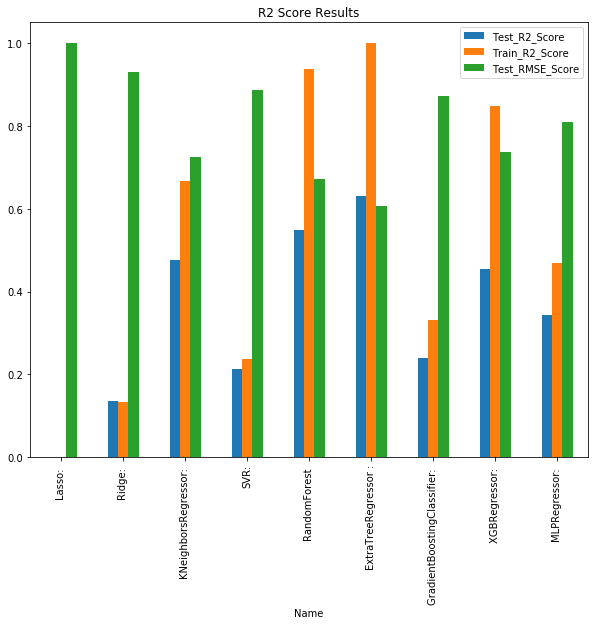

In [38]:
df.plot(x="Name", y=['Test_R2_Score' , 'Train_R2_Score' , 'Test_RMSE_Score'], kind="bar" , title = 'R2 Score Results' , figsize= (10,8)) ;

### Observations

1. Best results over test set are given by Extra Tree Regressor with R2 score of 0.63
2. Least RMSE score is also by Extra Tree Regressor 0.61
2. Lasso regularization over Linear regression was worst performing model

# Parameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = [{
              'max_depth': [80, 150, 200,250],
              'n_estimators' : [100,150,200,250],
              'max_features': ["auto", "sqrt", "log2"]
            }]
reg = ExtraTreesRegressor(random_state=40)
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = reg, param_grid = param_grid, cv = 5, n_jobs = -1 , scoring='r2' , verbose=2)
grid_search.fit(train_X, train_y)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 10.6min


In [40]:
# Tuned parameter set
grid_search.best_params_

{'max_depth': 80, 'max_features': 'sqrt', 'n_estimators': 200}

In [41]:
# Best possible parameters for ExtraTreesRegressor
grid_search.best_estimator_

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=80, max_features='sqrt', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=200, n_jobs=None, oob_score=False,
                    random_state=40, verbose=0, warm_start=False)

In [42]:
# R2 score on training set with tuned parameters

grid_search.best_estimator_.score(train_X,train_y)

1.0

In [43]:
# R2 score on test set with tuned parameters
grid_search.best_estimator_.score(test_X,test_y)

0.6257362897499856

In [44]:
# RMSE score on test set with tuned parameters

np.sqrt(mean_squared_error(test_y, grid_search.best_estimator_.predict(test_X)))

0.6117709622481393

### Observations

Based on parameter tuning step we can see that 

1. Best possible parameter combination are - 'max_depth': 80, 'max_features': 'sqrt', 'n_estimators': 200

    
2. Training set  R2 score of 1.0 may be signal of over-fitting on training set 


3. Test set R2 score is 0.6257 being a slight drop in improvement over 0.6312 achieved using untuned model


4. Test set RMSE score is 0.6117 being an improvement over 0.6073 achieved using untuned model 




### Feature Importance 

In [45]:
# Get sorted list of features in order of importance
feature_indices = np.argsort(grid_search.best_estimator_.feature_importances_)

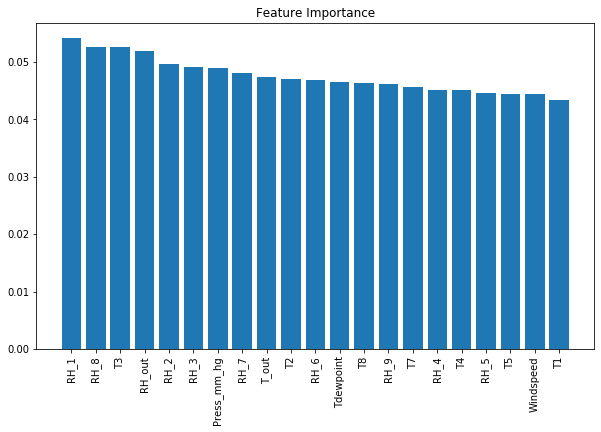

In [46]:
importance = grid_search.best_estimator_.feature_importances_
indices = np.argsort(importance)[::-1]
names = [train_X.columns[i] for i in indices]
# Create plot
plt.figure(figsize=(10,6))

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(train_X.shape[1]), importance[indices])

# Add feature names as x-axis labels
plt.xticks(range(train_X.shape[1]), names, rotation=90)

# Show plot
plt.show()

In [47]:
# Get top 5 most important feature 
names[:5]

['RH_1', 'RH_8', 'T3', 'RH_out', 'RH_2']

In [48]:
# Get 5 least important feature 
names[-5:]

['T4', 'RH_5', 'T5', 'Windspeed', 'T1']

In [49]:
# Reduce test & training set to 5 feature set
train_important_feature = train_X[names[:5]]
test_important_feature = test_X[names[:5]]

In [50]:
# Clone the Gridsearch model with this parameter and fit on reduced dataset

from sklearn.base import clone
cloned_model = clone(grid_search.best_estimator_)
cloned_model.fit(train_important_feature , train_y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=80, max_features='sqrt', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=200, n_jobs=None, oob_score=False,
                    random_state=40, verbose=0, warm_start=False)

In [53]:
# Reduced dataset scores 

print('Training set R2 Score - ', metrics.r2_score(train_y,cloned_model.predict(train_important_feature)))
print('Testing set R2 Score - ', metrics.r2_score(test_y,cloned_model.predict(test_important_feature)))
print('Testing set RMSE Score - ', np.sqrt(mean_squared_error(test_y, cloned_model.predict(test_important_feature))))


Training set R2 Score -  0.9999856585953557
Testing set R2 Score -  0.4973285507003614
Testing set RMSE Score -  0.7089932646363001


### Observations 

1. Based on parameter tunning step we can see that 

    a. 5 most important features are - 'RH_out', 'RH_8', 'RH_1', 'T3', 'RH_3'
    
    b. 5 least important features are - 'T7','Tdewpoint','Windspeed','T1','T5'
    

2. As can be observed with R2 Score , compared to Tuned model 0.63 the R2 score has come down to 0.49 which is a decrease of 14%


3. The reduction in R2 score is high. Hence, we should not use reduced feature set for this data set


# Conclusion

1. The best Algorithm to use for this dataset Extra Trees Regressor

2. The untuned model was able to explain 63% of variance on test set .

3. The tuned model was able to explain 63% of varaince on test set which is a slight improvement by less than 1%

4. The final model had 21 features 

5. Feature reduction was unable to improve the R2 score

